In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# read data
data_frame = pd.read_csv("diabetes_dataset.csv")

In [3]:
# first 5 row
data_frame.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


<Axes: xlabel='genders', ylabel='count'>

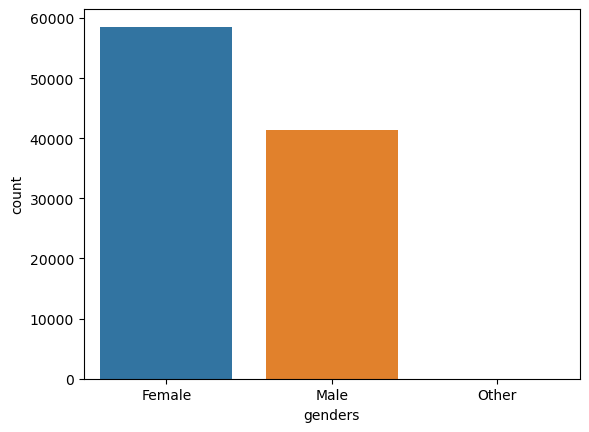

In [4]:
# see how many people are Female and Male and how many people from where.
gender = pd.DataFrame(data = data_frame.gender.value_counts())
gender = gender.reset_index().rename(columns= {"index":"genders","gender":"count"})
sbn.barplot(x=gender["genders"],y=gender["count"])

In [5]:
location = pd.DataFrame(data_frame.location.value_counts())
location = location.reset_index().rename(columns= {"index":"location","location":"count"})
location.head()

,location,count
0,Iowa,2038
1,Nebraska,2038
2,Kentucky,2038
3,Hawaii,2038
4,Florida,2037


In [6]:
# see smooking history
smk_hst = data_frame.smoking_history.value_counts()
a =list(smk_hst.index)
b =list(smk_hst.values)
c= zip(a,b)

In [7]:
for i,j in c:
    print(f"{i} smokers: %{(j/smk_hst.sum())*100}")

No Info smokers: %35.815999999999995
never smokers: %35.095
former smokers: %9.352
current smokers: %9.286
not current smokers: %6.447
ever smokers: %4.004


In [8]:
# describe data set
data_frame.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
# as a beginner we'll ignore race

In [10]:
# correlation analysis 


In [11]:
data_frame = data_frame.drop(columns=["race:AfricanAmerican","race:Asian","race:Caucasian","race:Hispanic","race:Other"])

C:\Users\PC\AppData\Local\Temp\ipykernel_4832\1095136157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(data_frame.corr(), annot = True,cmap="coolwarm")


<Axes: >

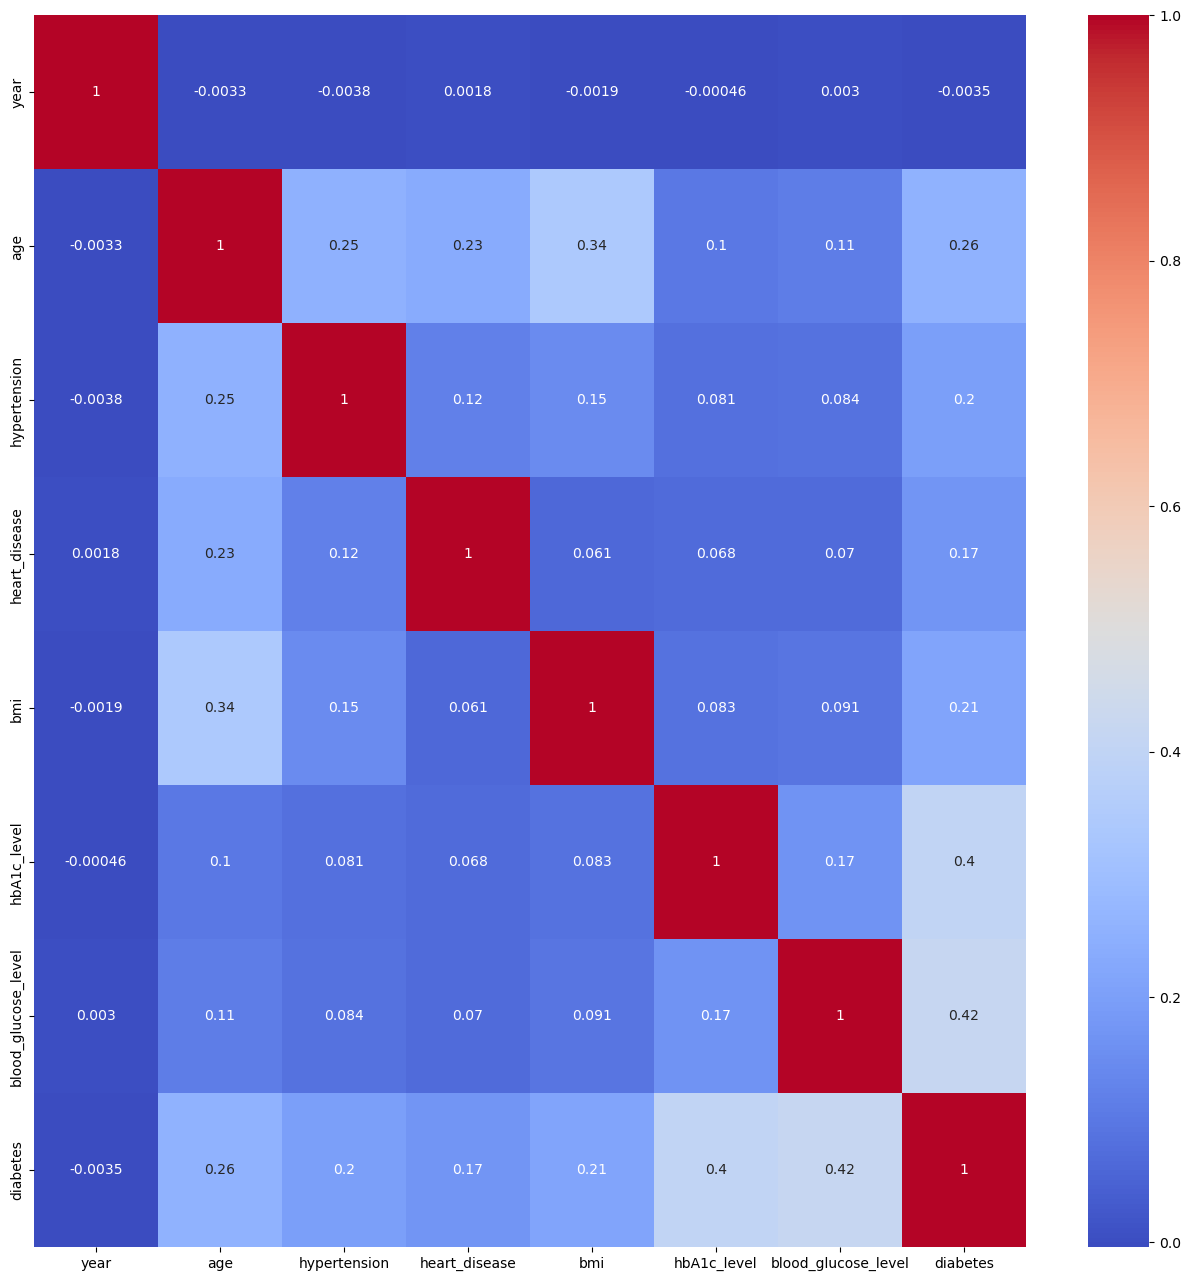

In [12]:
plt.figure(figsize=(16,16))
sbn.heatmap(data_frame.corr(), annot = True,cmap="coolwarm")

In [13]:
## as we can see above, blood glucose level and hbA1c_level have mild correlation with diabetes.

In [14]:
data_frame.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0


In [15]:
# encode objet to int
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
data_frame["gender"] = lbl_enc.fit_transform(data_frame["gender"])
data_frame["location"] = lbl_enc.fit_transform(data_frame["location"])
data_frame["smoking_history"] = lbl_enc.fit_transform(data_frame["smoking_history"])

In [16]:
data_frame.head(20)

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,0,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,0,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,0,0,0,4,23.75,6.5,90,0
5,2016,1,66.0,0,0,0,5,27.32,5.7,159,0
6,2015,0,49.0,0,0,0,1,24.34,5.7,80,0
7,2016,0,15.0,0,0,0,0,20.98,5.0,155,0
8,2016,1,51.0,0,0,0,4,38.14,6.0,100,0
9,2015,1,42.0,0,0,0,0,27.32,5.7,160,0


In [17]:
# creating model
from sklearn.model_selection import train_test_split
model = LinearSVC()
X = data_frame.drop('diabetes', axis=1)
y = data_frame['diabetes']


In [18]:
# split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
model.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [20]:
# validating

In [21]:
pred_vals = model.predict(X_test)

In [22]:
pred_vals

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model.score(X_test,y_test)

0.93452